In [1]:
# import all necessary packages and functions.
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the requied file
df_201402 = pd.read_csv('201402_station_data.csv')
result = df_201402.drop(df_201402.columns[[0,2,3]], axis=1)

# city stores the unique landmark names
cities = result.landmark.unique()
print (cities)

['San Jose' 'Redwood City' 'Mountain View' 'Palo Alto' 'San Francisco']


In [3]:
# Dictionary containing cities with corresponding number of docks and stations
no_of_docks,no_of_station = {},{}
for city in cities:
    land = result[result['landmark'].str.contains(city)]
    docks = land["dockcount"].sum()
    no_of_station[city] = len(land.index)
    no_of_docks[city] = docks

In [4]:
print('No. of Docks')
print(no_of_docks)
print ('No. of station')
print(no_of_station)

No. of Docks
{'Mountain View': 117, 'Palo Alto': 75, 'San Jose': 249, 'San Francisco': 665, 'Redwood City': 115}
No. of station
{'Mountain View': 7, 'Palo Alto': 5, 'San Jose': 15, 'San Francisco': 35, 'Redwood City': 7}


In [5]:
# sort for cities
sorted_names = sorted(no_of_docks, key=lambda x: no_of_docks[x])


In [6]:
# list of labels and values for pie chart
labels_dock,values_dock = [],[]
for key, value in no_of_docks.items():
    labels_dock.append(key)
    values_dock.append(value)
print(labels_dock)
print(values_dock)

['Mountain View', 'Palo Alto', 'San Jose', 'San Francisco', 'Redwood City']
[117, 75, 249, 665, 115]


In [7]:
labels_station,values_station  = [],[]
for key, value in no_of_station.items():
    labels_station.append(key)
    values_station.append(value)

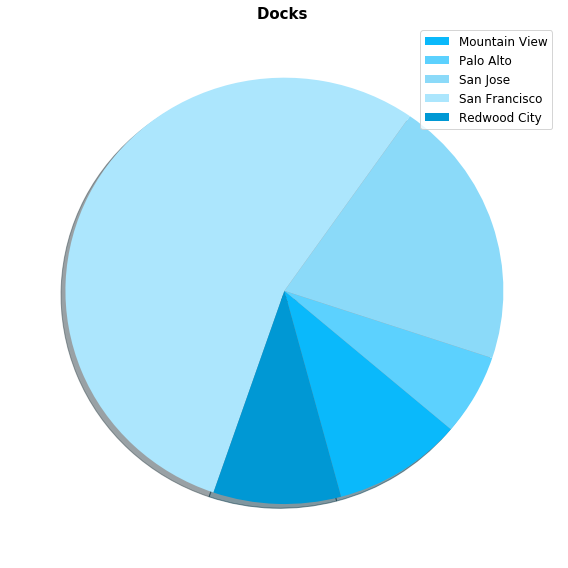

In [8]:
# Pie Chart to show the distribution of docks in different cities
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(8,8))
plt.title('Docks ', fontsize=15, fontweight='bold')
plt.pie(values_dock, shadow = True,colors = colors, startangle = 285)
plt.legend(labels_dock, fontsize = 'large')
plt.tight_layout()
plt.show()

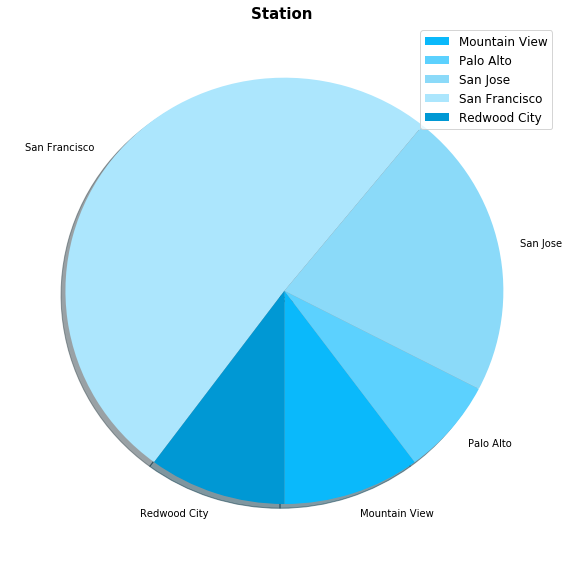

In [9]:
# Pie Chart to show the distribution of station in different cities
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(8,8))
plt.title('Station ', fontsize=15, fontweight='bold')
patches = plt.pie(values_station,labels =labels_station, shadow = True, colors = colors, startangle= 270)
plt.legend(labels_station, fontsize = "large")
# View the plot
plt.tight_layout()
plt.show()

### Who uses the Bay Area Bike Share?

In [10]:
df_trip_201402 = pd.read_csv('201402_trip_data.csv', names=('TripID','Duration','Start_Date','Start_Station','Start_Terminal','End_Date','End_Station','End_Terminal','Bike','Subscription_Type','Zip_Code'), header = 0)
df_trip_201402['Start_Date'] = pd.to_datetime(df_trip_201402['Start_Date'])
df_trip_201402['End_Date'] = pd.to_datetime(df_trip_201402['End_Date'])
# city stores the unique landmark names
subscription = df_trip_201402.Subscription_Type.unique()

In [11]:
def days(day):
    weekdays = {"0":"Monday", "1":"Tuesday", "2": "Wednesday", "3":"Thursday", "4":"Friday", "5":"Saturday", "6":"Sunday"}
    return (weekdays[day])

In [12]:
def manipulate_list(a):
    c = a[-1]
    a.insert(0,c)
    del a[-1]
    return a

In [13]:
weekday = ["Monday", "Tuesday",  "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [14]:
subscription_count = []
for i in subscription:
    sub = df_trip_201402[df_trip_201402['Subscription_Type'].str.contains(i)]
    subscription_count.append(len(sub.index))

print (subscription)
print (subscription_count)

['Subscriber' 'Customer']
[113647, 30368]


In [15]:
# Extract the date
df_trip_201402["only_date"] = [d.date() for d in df_trip_201402["Start_Date"]]

# Added a new column weekdays
df_trip_201402["weekdays"] = [days(str(d.weekday())) for d in df_trip_201402["only_date"]]

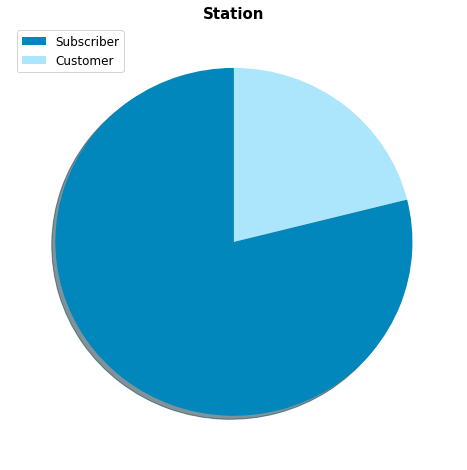

In [16]:
# Pie Chart to show the distribution Subscribers and customers
colors = ["#0287BC", "#ACE6FD"]
plt.figure(figsize=(8,8))
plt.title('Station', fontsize=15, fontweight='bold')
patches = plt.pie(subscription_count, shadow = True, colors = colors, startangle=90)
plt.legend(subscription, fontsize = 'large')
plt.show()

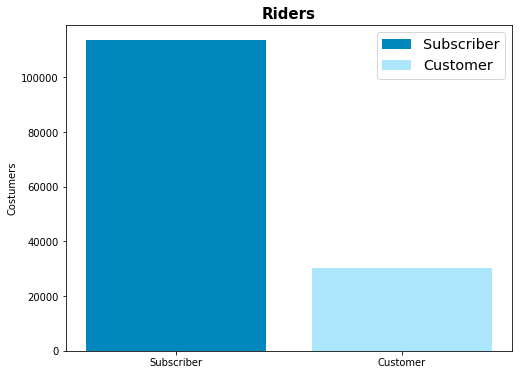

In [17]:
x_plot = np.arange(len(subscription_count))
plt.figure(figsize=(8,6))
patches = plt.bar([1,2], subscription_count, color=colors)
plt.title("Riders", fontsize = 15, fontweight = "bold")
plt.ylabel('Costumers')
plt.xticks(x_plot+1, subscription)
plt.legend(patches, subscription, fontsize = 'x-large')
plt.show()

In [18]:
sub = 0
cust = 0
su,cu,total = {},{},{}
su_l, cu_l, total_l = [],[],[]

for i in weekday:
    subsc = df_trip_201402[df_trip_201402['weekdays'].str.contains(i)]
    sub,cust = 0,0
    for j in range(len(subsc.index)):
        if (subsc.iloc[j]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su[i] = sub
    su_l.append(sub)
    cu[i] = cust
    cu_l.append(cust)
    total[i] = (sub + cust)
    total_l.append(sub + cust)
    
su_l = manipulate_list(su_l)
cu_l = manipulate_list(cu_l)
total_l = manipulate_list(total_l)
print("Number of Subscribers")
print(su)
print(su_l)
print("Number of Costumers")
print(cu)
print(cu_l)
print("Total number of riders")
print(total)
print(total_l)

Number of Subscribers
{'Monday': 19705, 'Sunday': 5003, 'Tuesday': 21461, 'Saturday': 6073, 'Friday': 19763, 'Thursday': 21394, 'Wednesday': 20248}
[5003, 19705, 21461, 20248, 21394, 19763, 6073]
Number of Costumers
{'Monday': 3433, 'Sunday': 5584, 'Tuesday': 3217, 'Saturday': 6340, 'Friday': 4520, 'Thursday': 3871, 'Wednesday': 3403}
[5584, 3433, 3217, 3403, 3871, 4520, 6340]
Total number of riders
{'Monday': 23138, 'Sunday': 10587, 'Tuesday': 24678, 'Saturday': 12413, 'Friday': 24283, 'Thursday': 25265, 'Wednesday': 23651}
[10587, 23138, 24678, 23651, 25265, 24283, 12413]


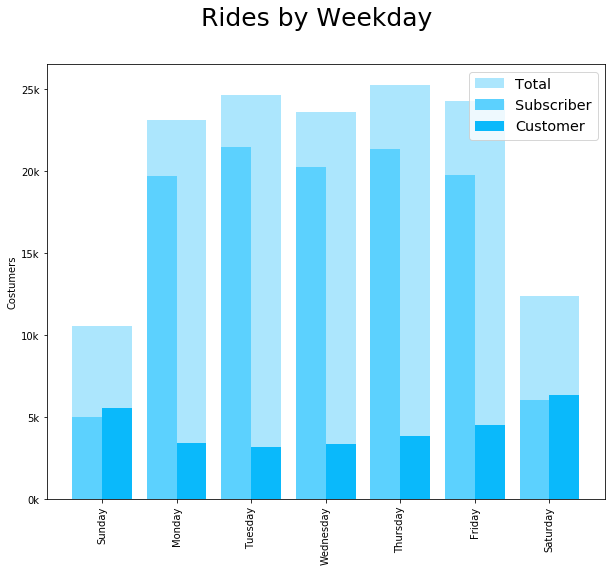

In [19]:
weekday = ["Sunday","Monday", "Tuesday",  "Wednesday", "Thursday", "Friday", "Saturday"]
x_plot = np.arange(len(weekday))
bar_width = 0.4
plt.figure(figsize=(10,8))
p_map1 = plt.bar(x_plot+1, total_l, (bar_width*2), color="#ACE6FD", label="total")
p_map2 = plt.bar(x_plot+0.8, su_l, bar_width, label='Subscriber', color="#5CD1FE")
p_map3 = plt.bar(x_plot+1.2, cu_l, bar_width, color="#0AB9FB")
plt.suptitle("Rides by Weekday", fontsize = 25)
plt.ylabel('Costumers')
plt.xticks(x_plot+1, weekday, rotation='vertical')
plt.yticks([0,5000,10000,15000,20000,25000],['0k','5k', '10k','15k','20k', '25k'])
plt.legend([p_map1,p_map2,p_map3],['Total','Subscriber','Customer'],fontsize = 'x-large')
plt.show()

In [20]:
# Extract the date
df_trip_201402["only_time"] = [str(d.time()) for d in df_trip_201402["Start_Date"]]
df_trip_201402["only_hour"] = 0
only_hour = []
for j in range(len(df_trip_201402.index)):
    a = (df_trip_201402.iloc[j]['only_time'])
    if (a[0] == '0'):
        a = a[1]
    else :
        a = a[:2]
    only_hour.append(int(a))
    
df_trip_201402["only_hour"] = only_hour

In [21]:
hour = []
for i in range(1,24):
    hour.append(i)
print(hour)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [22]:
sub,cust = 0,0
su,cu,total = {},{},{}
su_l,cu_l,total_l = [],[],[]
df_bike = df_trip_201402[["only_hour", "Bike", "Subscription_Type"]]
bike_count_l = []
for j in hour:
    b = df_bike[df_bike["only_hour"] == j]
    sub,cust = 0,0
    for i in range(len(b.index)):
        if (b.iloc[i]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su[j] = sub
    su_l.append(sub)
    cu[j] = cust
    cu_l.append(cust)
    total[j] = (sub + cust)
    total_l.append(sub + cust)

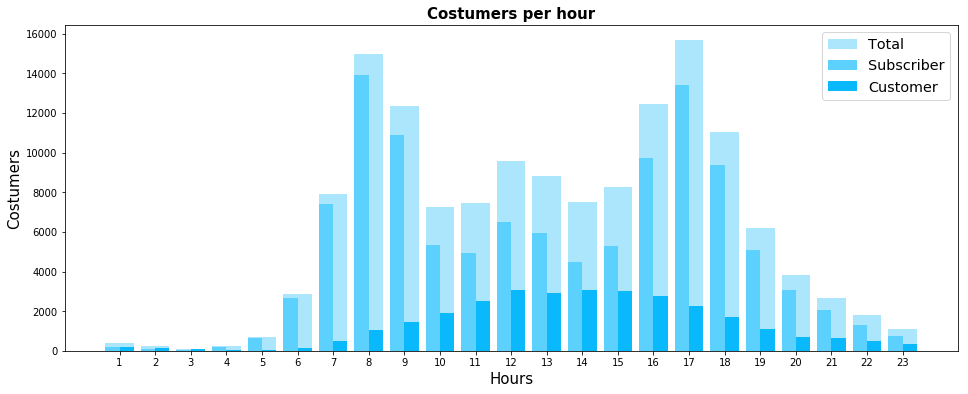

In [23]:
x_plot = np.arange(len(hour))
plt.figure(figsize=(16,6))
bar_width = 0.4
patch1 = plt.bar(x_plot+1, total_l, (bar_width*2), color="#ACE6FD")
patch2 = plt.bar(x_plot+0.8, su_l, bar_width, color="#5CD1FE")
patch3 = plt.bar(x_plot+1.2, cu_l, bar_width, color="#0AB9FB")
plt.title("Costumers per hour", fontsize = 15, fontweight = "bold")
plt.ylabel('Costumers', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.xticks(x_plot+1, hour)
plt.legend([patch1,patch2,patch3],['Total','Subscriber','Customer'], fontsize = 'x-large')
plt.show()

In [24]:
df_trip_201402['Time_diff'] = 0
time_diff = df_trip_201402['End_Date'] - df_trip_201402['Start_Date']
time_diff = pd.to_datetime(time_diff)

total_time = []
for i in time_diff:
    h = i.hour
    m = i.minute
    tt = h*60 + m
    total_time.append(tt)

df_trip_201402['Time_diff'] = total_time

In [25]:
time_set = set(total_time)
time_set = list(time_set)
time_s = []
for y in time_set:
    if (y<=60):
        time_s.append(y)

In [26]:
sub = 0
cust = 0
su_l, cu_l, total_l = [],[],[]
for t in time_s:
    df = df_trip_201402[df_trip_201402['Time_diff'] == t]
    sub,cust = 0,0
    for j in range(len(df.index)):
        if (df.iloc[j]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su_l.append(sub)
    cu_l.append(cust)
    total_l.append(sub + cust)

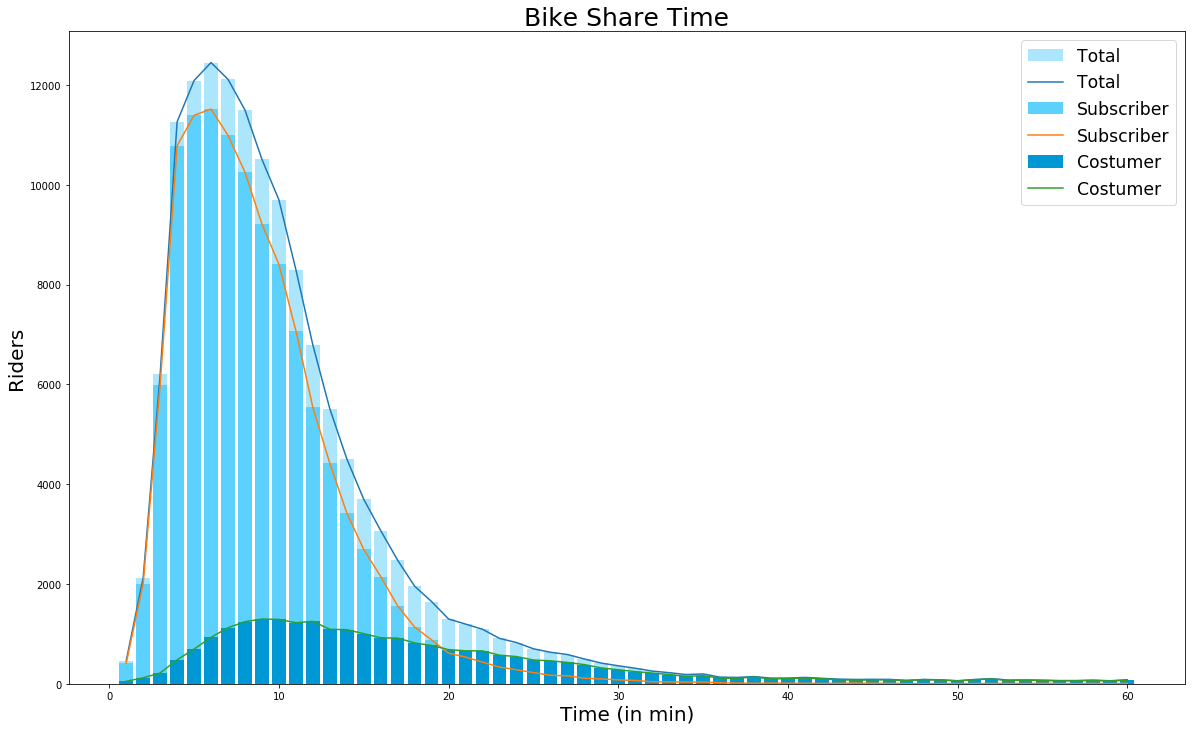

In [29]:
plt.figure(figsize=(20,12))
plt.title("Bike Share Time", fontsize = 25)
plt.xlabel("Time (in min)", fontsize = 20)
plt.ylabel("Riders", fontsize = 20)
p11, = plt.plot(time_s,total_l)
p22, = plt.plot(time_s,su_l)
p33, = plt.plot(time_s,cu_l)
p1 = plt.bar(time_s,total_l, color = "#ACE6FD")
p2 = plt.bar(time_s,su_l, color = "#5CD1FE")
p3 = plt.bar(time_s,cu_l, color = "#0098D4")
plt.legend([p1,p11,p2,p22,p3,p33],["Total","Total","Subscriber","Subscriber","Costumer","Costumer"],fontsize = 'xx-large')
plt.show()